# Day Four: Transformation and Visualization

As always, import pandas using the conventional alias `pd` and set `max_columns` to None so that all columns are displayed.

In [2]:
import pandas as pd
pd.options.display.max_columns = None
print(pd.__version__)

2.3.3


### Loading Data

Today, we'll resume working with the [**Oregon Public Library Statistics**](https://data.oregon.gov/dataset/Oregon-Public-Library-Statistics/8zw7-zgjw) dataset.

In [3]:
URL = "https://data.oregon.gov/resource/8zw7-zgjw.json?year=2024"
libraries = pd.read_json(URL)
libraries.head(5) # Peek at the first five rows

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate
0,OR0040,2024,Adams Public Library,PO Box 20,Adams,97810,PO Box 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,237.0,21.0,0.00,0.62,0.00,0,0,False,False,0,0,1,1,0.0,0.0,49676.27,1000,7030,0.0,35036.0,0.0,0.0,0.0,0.0,31065.77,0.00,8672.86,0.00,0.00,11831.97,0.0,0.0,0.0,3155,330,85,38,714,97,23,7,62617,7261,511,119,40311,4260,388,1916,0,0,0,0,0,0,0,0,22,0,1,0,350.0,149.0,464.0,175.0,504.0,230.0,0.0,0.0,542.0,412.0,439.0,19,500,0,495,0,0.0,N/A (we do not track reference transactions),77.0,True,101,498,48.0,120.0,53.0,378.0,53.0,378.0,16.0,96.0,53.0,378,0,0,0,0,8.0,50.0,323.0,Actual count (we track each transaction as it ...,3,

In our previous lesson, you were introduced to `Series.map()`, a handy way to apply unary functions to values within a Series. Today,
you will learn to how transform, aggregate, and reshape values across multiple columns or rows in a DataFrame.

We will start with Boolean operations and aggregators, as those are the simplest to manipulate at scale.

### Boolean Aggregation with `.any()` and `.all()`

We can use the aggregators [**.any()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html#pandas.DataFrame.any) and [**.all()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.all.html#pandas.DataFrame.all) to manipulate the Boolean arrays (like those returned by **.isna()** or **.notna()** to answer questions about the frequency of null values in DataFrames. 

As a refresher, `DataFrame.isna()` returns a Boolean index of the same shape as the parent DataFrame, with a `True` where values
are `np.Nan` or `None` and `False` otherwise.

In [4]:
libraries.isna()

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

Let's say we want to find out which columns have *at least* one null value. The [**.any()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) method will help us here. Given an array of booleans, it returns `True` if there any `True` values, and `False` otherwise. 


### The `axis=` Parameter Controls Dimensionality Reduction
The **axis** parameter is extremely important in Pandas but a little tricky.

It represents which axis should be **reduced**, which means that aggregating by index=0 (index) will produce one value for each *column*, which aggregating by index=1 (column) will produce one value for each *row*.

**NOTE**: When looking for examples that use the `axis=` keyword, you will see `axis="index"` and `axis=0` forms used interchangeably. Both are acceptable in Pandas, so whichever is easier for you to remember.

When values are aggregated across the index axis, one aggregate value is generated for each *column*.

In [5]:
libraries.isna().any(axis="index") # axis = 0, reduce rows

libid                       False
year                        False
libraryname                 False
address                     False
city                        False
                            ...  
collectionotherlanguages     True
revenuelevystartdate         True
revenuelevyenddate           True
capitalbondamount            True
capitalbondenddate           True
Length: 173, dtype: bool

Conversely, when values are aggregated across the columns axis, one aggregate value is for each index (or row).

In [6]:
libraries.isna().any(axis="columns") # Reduce columns, one per row

0      True
1      True
2      True
3      True
4      True
       ... 
131    True
132    True
133    True
134    True
135    True
Length: 136, dtype: bool

We can use this same principle to count the number of NaNs per row.

In [7]:
libraries.isna().sum(axis="columns")

0       9
1       8
2       8
3       3
4      11
       ..
131     5
132    11
133     4
134    24
135    14
Length: 136, dtype: int64

Or the total number of NaNs per column.

In [8]:
libraries.isna().sum(axis="index")

libid                         0
year                          0
libraryname                   0
address                       0
city                          0
                           ... 
collectionotherlanguages     61
revenuelevystartdate        110
revenuelevyenddate          111
capitalbondamount           129
capitalbondenddate          129
Length: 173, dtype: int64

The `axis=` parameter is available in many Pandas functions, including the more powerful, and more flexible cousin to **.map()**, **.apply()**.

## Aggregating Rows or Columns with DataFrame.apply()

What if you wanted to operate on a DataFrame by aggregating across columns or rows? What if you want an entire column or row as input? That's where the powerful and flexible [**DataFrame.apply()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) function comes in.

The input to **DataFrame.apply()** depends on whether you pass in a row `axis="columns"` or a column `axis="index"`.

## Aggregating with Functions Along Columns

Let's say you're interested in documenting how many libraries in Oregon have fines.
By [**filtering**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html) to those with `fines` in their name in the `libraries` DataFrame, you'll notice there's a problem.
The information is distributed across three columns!

In [9]:
libraries.filter(like="fines") # Slice to columns with "fines" in the name, case-sensitive

,finesadultmaterials,fineschildrensmaterials,finesyamaterials
0,FALSE,FALSE,FALSE
1,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE
4,TRUE,TRUE,TRUE
...,...,...,...
131,TRUE,TRUE,TRUE
132,TRUE,TRUE,TRUE
133,FALSE,FALSE,FALSE
134,FALSE,FALSE,FALSE


We've got a data problem! These are strings `TRUE` and `FALSE` rather than Python Booleans. 

We need to apply a 1:1 transformation on all the values in these columns to aggregate them, using the same mapping function on
all three columns.

### Mapping Values in Multiple Columns with DataFrame.map()

We need to write a function to express the mapping `TRUE -> True` and `FALSE -> False` to Pandas. Let's write a custom function to use with `DataFrame.map()`, a version of `Series.map()` that can operate on each value in a DataFrame.

In [5]:
def tf_mapper(x):
    if x == "TRUE":
        return True
    else:
        return False


We can now apply this function with `DataFrame.map()`. Remember, pass in the function by name.

In [6]:
libraries.filter(like="fines").map(tf_mapper)

,finesadultmaterials,fineschildrensmaterials,finesyamaterials
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,True,True,True
...,...,...,...
131,True,True,True
132,True,True,True
133,False,False,False
134,False,False,False


Looks good, let's assign these three corrected columns back to the parent DataFrame.

In [7]:
libraries.loc[:,["finesadultmaterials", "fineschildrensmaterials", "finesyamaterials"]] = libraries.filter(like="fines").map(tf_mapper)

In [8]:
libraries.filter(like="fines")

,finesadultmaterials,fineschildrensmaterials,finesyamaterials
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,True,True,True
...,...,...,...
131,True,True,True
132,True,True,True
133,False,False,False
134,False,False,False



### Aggregating a Custom Function with DataFrame.apply()

Now, in order to create our `has_fines` column, we write to apply a function that takes in each row of the `libraries` DataFrame
and compares the three columns related to fines.

When passing in a row, you can refer to specific values within the DataFrame using column names.

In [9]:
# Returns a boolean given a **row** in a DataFrame 
def has_fines(row): # We will apply this along the column axis, each argument is a row
    if row["finesadultmaterials"] or row["finesyamaterials"] or row["fineschildrensmaterials"]:
        return True
    return False

Because we want to apply this function to each `row`, we must use the `columns` axis.

In [10]:
libraries.apply(has_fines, axis="columns") 

0      False
1      False
2      False
3      False
4       True
       ...  
131     True
132     True
133    False
134    False
135     True
Length: 136, dtype: bool

When we're satisfied with the results, create a new column in the `libraries` DataFrame named `has_fines`.

In [11]:
libraries["has_fines"] = libraries.apply(has_fines, axis="columns")


Let's use `.value_counts()` to look at the distibution of our new variable.

In [12]:
libraries["has_fines"].value_counts()

has_fines
False    96
True     40
Name: count, dtype: int64

We can also quickly plot this with `.plot()`. By default, it will assume each row is a unique observation to plot.

<Axes: xlabel='has_fines'>

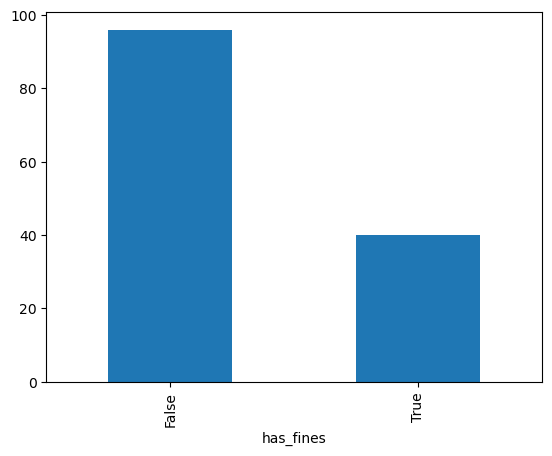

In [13]:
libraries["has_fines"].value_counts().plot(kind="bar")

As you can see, the majority of Oregon public libraries do not levy any fines.

## Aggregating with Functions on Rows

By switching our `axis` argument to `index`, we can write functions that take in columns instead. Remember that you will need to use either functions that take in vectorized input or functions that reference specific rows. Let's practice with **numpy**'s standard deviation function [**np.std()**](https://numpy.org/doc/stable/reference/generated/numpy.std.html) to compute the standard deviation of each **numeric** column in the `libraries` DataFrame.

In [23]:
import numpy as np

First, let's select all the *numeric* columns. We can use the handy 
[**DataFrame.select_dtypes()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) method pass in the dtype we want to select. `number` is a convenient shorthand for all numeric dtypes, including both int64 and float64.

In [24]:
libraries.select_dtypes("number").head(2) # Select only numeric columns

,year,zip,mailingzip,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,meetingroomuse,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputers,techuploadspeed,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,referencetransactions,techwifisessions,feesnonresident,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate
0,2024,97810,97810,1,0,0,237.000,21.000,0.000,0.620,0.000,0,0,0,0,1,1,0.000,0.000,49676.270,1000,7030,0.000,35036.000,0.000,0.000,0.000,0.000,31065.770,0.000,8672.860,0.000,0.000,11831.970,0.000,0.000,0.000,3155,330,85,38,714,97,23,7,62617,7261,511,119,40311,4260,388,1916,0,0,0,0,0,0,0,0,22,0,1,0,350.000,149.000,464.000,175.000,504.000,230.000,0.000,0.000,542.000,412.000,439.000,19,500,0,495,0,0.000,77.000,101,498,48.000,120.000,53.000,378.000,53.000,378.000,16.000,96.000,53.000,378,0,0,0,0,8.000,50.000,323.000,3,269.200,25.000,0.000,0.000,0.000,52,1220.000,2740.000,425,425,2003.000,19.800,19.800,0.000,0.000,0.000,0.000,13.200,13.200,0.000,0.000,1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,97406,97406,1,0,0,81.000,0.000,0.000,0.350,0.250,16,90,0,1,0,1,0.000,0.000,24732.130,1000,0,0.000,0.000,0.000,0.000,0.000,0.000,12012.000,3253.000,0.000,0.000,0.000,10500.000,0.000,0.000,0.000,7339,20,47,47,770,10,0,0,62617,7261,0,0,40311,4260,0,0,0,0,0,0,3,0,0,0,22,0,3,0,600.000,211.000,30.000,30.000,85.000,16.000,0.000,0.000,0.000,0.000,16.000,0,370,0,1289,3,0.000,0.000,79,60,7.000,30.000,72.000,30.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0.000,0.000,262.000,2,0.340,14.000,0.000,0.000,0.000,52,670.000,653.000,865,865,NaN,NaN,18.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,15.

In [25]:
libraries.select_dtypes("object").head(2) # Inverse, select strings

,libid,libraryname,address,city,mailingaddress,mailingcity,county,phone,distcoop,referencetransactionsmethod,techpubliccomputersmethod,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techsharedils,techilsproductname,libraryvisitsmethod,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,geographiccode,website,startdate,enddate,techisptype,facilitiescapproject,expendituresservicecharges,collectionotherlanguages
0,OR0040,Adams Public Library,PO Box 20,Adams,PO Box 20,Adams,Umatilla,541-566-3038,UCSLD,N/A (we do not track reference transactions),Actual count (we track each transaction as it ...,Wi-Fi extends outside building (left on 24/7),N/A (we don't track computer usage),373.4,Sage,Evergreen,Actual count (we track each visit as it happens),False,False,False,$0.00,ME,CI,SO,PL2,{'url': 'http://www.cityofadamsoregon.com/adam...,2023-07-01T00:00:00.000,2024-06-30T00:00:00.000,Fiber,No,NaN,NaN
1,OR0001,Agness Community Library District,PO BOX 33,AGNESS,PO Box 33,Agness,Curry,541-247-6323,NONE,Actual count (we track each transaction as it ...,Actual count (we track each transaction as it ...,Wi-Fi extends outside building (left on 24/7),Actual count (we track each transaction as it ...,4.14,Coastline,Koha,Actual count (we track each visit as it happens),False,False,False,$2.00,ME,LD,SO,OTH,{'url': 'https://agnesscommunitylibrary.weebly...,2023-07-01T00:00:00.000,2024-06-30T00:00:00.000,Satellite,No,NaN,NaN


Now that we have the numeric columns, we can use the `np.std` standard deviation function on each *column*.
The np.std function expects an array as input.

In [29]:
libraries.select_dtypes("number").apply(np.std, axis="index")

year                           0.000
zip                          284.578
mailingzip                   284.578
centrallibrary                 0.085
branches                       2.308
                            ...     
feesnonresident               38.559
revenuelevystartdate          12.382
revenuelevyenddate             1.233
capitalbondamount      137638641.050
capitalbondenddate             5.592
Length: 132, dtype: float64

To replace the scientific notation in our results, you can use the following
formatting option to round values in scientific notation to 3 decimal places.

In [30]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

In [31]:
libraries.select_dtypes("number").apply(np.std, axis="index")

year                           0.000
zip                          284.578
mailingzip                   284.578
centrallibrary                 0.085
branches                       2.308
                            ...     
feesnonresident               38.559
revenuelevystartdate          12.382
revenuelevyenddate             1.233
capitalbondamount      137638641.050
capitalbondenddate             5.592
Length: 132, dtype: float64

## Split-Apply-Combine

We've discussed operations on all the rows in a DataFrame or all the columns in a DataFrame, but what if we want to aggregate based on *groups* of categorical variables?

This splitting into groups forms the third component of the split-apply-combine paradigm.

* **Split** the data into groups based on some criteria.

* **Apply** a function to each group, whether filtering or transforming.

* **Combine** results.



Grouping in Pandas is performed with the [**DataFrame.groupby()**](https://pandas.pydata.org/docs/user_guide/groupby.html) method.

Because each row must fall into one group, grouping is done categorical variable, discrete numeric variables, or binned continuous variables.

Let's start with an easy example, our `has_fines` variable. Either a library has fines, or it doesn't.

To group by the value of a variable, pass the name of the column in as an argument.

In [32]:
libraries.groupby("has_fines")

This returns a special groupby object, but we haven't actually aggregated anything yet. Our next step is to *filter* to our columns of interest, then *combine* those results through aggregation.

Let's see if we can answer the following question: do libraries that levy fines have higher circulation on average? Start with `circadult`.

In [33]:
libraries.groupby("has_fines")["circadult"].mean()

has_fines
False   59986.292
True    40407.333
Name: circadult, dtype: float64

On average we see higher circulation for *adult* materials, what if we want to see aggregates for multiple circulation types?

Let's pass in the list `["circadult", "circya", "circchildrens"]`.

In [34]:
libraries.groupby("has_fines")[["circadult", "circya", "circchildrens"]].mean()

,circadult,circya,circchildrens
has_fines,,,
False,59986.292,6030.337,58175.326
True,40407.333,3874.846,40016.974


To apply multiple aggregations functions on the same groupings, you can use the [**DataFrameGroupBy.agg()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html#pandas.core.groupby.DataFrameGroupBy.aggregate) method on a GroupBy object followed by a list of functions, either default or user defined.

Let's see if mean and median differ by passing in `["median", "mean"]`.

In [35]:
libraries.groupby("has_fines")[["circadult", "circya", "circchildrens"]].agg(["median", "mean"])

circadult             circya          circchildrens          
             median      mean   median     mean        median      mean
has_fines                                                              
False     15916.000 59986.292 1635.000 6030.337     12024.000 58175.326
True      16180.000 40407.333 2100.000 3874.846     18898.000 40016.974

What can you say about this distribution in terms of mean and median?

## Plotting with DataFrame.plot()

Pandas has a built-in plotting library [**DataFrame.plot()**](https://pandas.pydata.org/docs/user_guide/visualization.html) made from matplotlib.pyplot that we can use to generate quick visualizations from DataFrames.

For example, let's make a quick plot on our grouped circulation data. In this case,
a grouped barplot `kind=bar` is appropriate. Because our data is *skewed*, we will
use the median instead of the mean.

<Axes: xlabel='has_fines'>

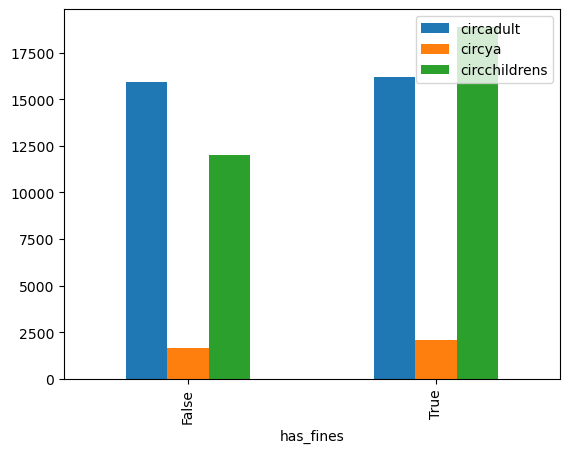

In [36]:
libraries.groupby("has_fines")[["circadult", "circya", "circchildrens"]].median().plot(kind="bar")

## Plotting Two Continuous Variables: Scatterplots

We can use the **.plot(kind="scatter")** method to plot two *continuous* variables against one another by passing in `x=` and `y=` arguments. Remember to put column names in quotes.

Let's say we want to look at the relationship between `circadult` (book checkouts for adults) and `collectionbooksadded` (books purchased for a collection in 2024) for libraries in Oregon.

<Axes: xlabel='circadult', ylabel='collectionbooksadded'>

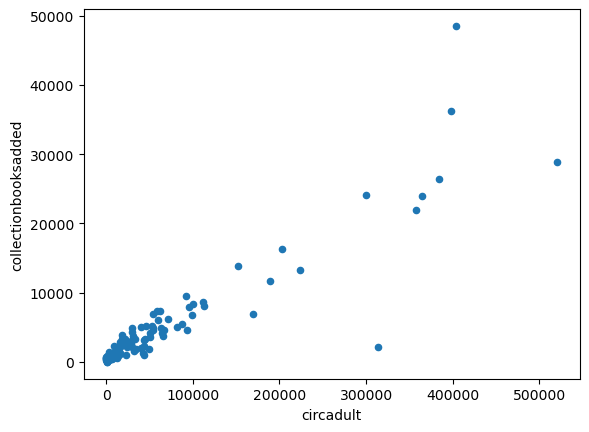

In [37]:
libraries.plot.scatter(x="circadult", y="collectionbooksadded")

You can see that there is a positive correlation between the two variables: libraries that add more books are more likely to see higher circulation.

## Concatenating DataFrames
Let's say we want to a line graph, which typically has *time* on the x-axis. This is a problem the `libraries` dataset, as we only asked for the year 2024. We can get the result we want by *concatenating* multiple years together.


Concatenation in Pandas is performed with the [**pandas.concat**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function, which takes in a list of two or more DataFrames or Series. Let's practice with two toy DataFrames.

In [48]:
f1 = pd.DataFrame({"a":[1,2], "b":[3,4]}) # Two columns, two rows
f2 = pd.DataFrame({"b":[5,6], "c":[8,9]}) # Two columns, two columns

In [49]:
f1

,a,b
0,1,3
1,2,4


In [50]:
f2

,b,c
0,5,8
1,6,9


The `pd.concat()` function concatenates frames or Series along a particular axis. 
Concatenating along the "index" axis stacks them along the x-axis. 
By default, each row is treated as a separate data point.

In [51]:
pd.concat([f1, f2], axis="index")

,a,b,c
0,1.000,3,NaN
1,2.000,4,NaN
0,NaN,5,8.000
1,NaN,6,9.000


You could choose to reindex the result starting at 0 with 
`ignore_index=True`.

In [52]:
pd.concat([f1, f2], axis="index", ignore_index=True)

,a,b,c
0,1.000,3,NaN
1,2.000,4,NaN
2,NaN,5,8.000
3,NaN,6,9.000


Concatenating along the "columns" axis stacks DataFrames along
the y-axis.

In [53]:
pd.concat([f1, f2], axis="columns")

,a,b,b,c
0,1,3,5,8
1,2,4,6,9


Notice that this result leaves you with two 'b' columns!

You can choose to reindex along the concatenation axis.

In [54]:
pd.concat([f1, f2], axis="columns", ignore_index=True)

,0,1,2,3
0,1,3,5,8
1,2,4,6,9


Most APIs return a limited number of rows per query, as APIs are designed to transmit small pieces of data at a time over the internet. Therefore, in order to get a full picture of the data, you will need to make several calls.

We're going to use the "year" parameter to get one year's worth of data at a time, just as we did for 2024, but now we're going to get the data for 2023, 2022, 2021, 2020, 2019, and 2018 as well.

In [56]:
import time
base_url = "https://data.oregon.gov/resource/8zw7-zgjw.json?year="
libraries_years = []

# Constructing the loop, identify what needs to change (the year)
for year in range(2024, 2017, -1): # Start, stop (exclusive), step
    query_url = base_url + str(year) # creates a valid url
    print("Getting data from", query_url) # test the url
    frame = pd.read_json(query_url) # read the JSON to a DataFrame
    libraries_years.append(frame) # Add the DataFrame to a list
    time.sleep(2)
    print("Waiting two seconds to be polite.")

Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2024
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2023
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2022
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2021
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2020
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2019
Waiting two seconds to be polite.
Getting data from https://data.oregon.gov/resource/8zw7-zgjw.json?year=2018
Waiting two seconds to be polite.


Inspect `libraries_years`. It is a *list* of 7 DataFrames, one DataFrame per year.

In [57]:
print(type(libraries_years))

<class 'list'>


In [58]:
print(len(libraries_years))

7


You can peek at each of the 7 DataFrames by indexing into the list and using .head().

In [59]:
libraries_years[6].head(2) # 2018, first two rows

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueerate,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expendituresperiodicals,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideoslocal,collectiondigitalvideosl,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactions,programssummerreading,programskids0_11,programskids0_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,techpubliccomputers,techdownloadspeed,techsharedils,techilsproductname,techwebsitevisits,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,facilitiessqftcentral,facilitiessqfttotal,finesadultmaterials,finesyamaterials,feesill,feesnonresident,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,startdate,enddate,circothermaterials,circothermaterialsrenewals,techpubliccomputerssessions,techwifisessions,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,registeredusersadded
0,OR0040,2018,Adams Public Library,190 Main St,Adams,97810.000,PO Box 20,Adams,97810.000,Umatilla,541-566-3038,UCSLD,1,0,0,251.000,0.000,0.630,0.000,24.000,58.000,1.000,0.000,7000.000,0.000,28952.000,1000.000,0.000,0.000,0.000,835.000,0.000,0.000,0.000,0.000,25709.000,2254.000,1988.000,0.000,0.000,0.000,7461.000,0.000,0.000,0.000,3231.000,101.000,282.000,14.000,559.000,22.000,120.000,7.000,45061,5554,0,0,27310,3943,0,0,0.000,0.000,2.000,0.000,23,0,12.000,0.000,775.000,81.000,109.000,9.000,372.000,56.000,153.000,0.000,319.000,3.000,54.000,0.000,6.000,222.000,1.000,14.000,102.000,14.000,44.000,16.000,124.000,1.000,6.1M-10Mbps,Sage,Evergreen,40255.000,16,4,0,0,52.000,1040,1412.000,425,425,0.200,0.500,0,30.000,537,ME,CI,SO,True,CI1,2017-07-01T00:00:00.000,2018-06-30T00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OR0001,2018,Agness Community Library District,03905 Cougar Ln,Agness,97406.000,PO Box 33,Agness,97406.000,Curry,541-247-6323,NONE,1,0,0,113.000,0.000,0.350,0.250,15.000,80.000,0.000,0.000,0.000,0.000,18323.000,1000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7320.000,1869.000,0.000,0.000,0.000,0.000,8017.000,0.000,0.000,0.000,7309.000,574.000,180.000,27.000,623.000,214.000,1.000,0.000,45061,5554,0,0,27310,3943,0,0,0.000,0.000,1.000,0.000,23,0,0.000,0.000,789.000,157.000,74.000,18.000,125.000,21.000,32.000,0.000,405.000,117.000,550.000,0.000,0.000,NaN,1.000,8.000,49.000,0.000,0.000,0.000,0.000,2.000,769Kbps-1.4 Mbps,CurryÃƒÆ’Ã†â€™Ãƒâ€ Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Â 

Once you have a working list of DataFrames, you can concatenate them into one DataFrame named `all_years` using [**pd.concat**](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).
Remember, you need to specify a list **AND** an axis for concatenation to work as intended. This operation is only safe to do because we know that each successive set of rows *has the same columns* as the parent.

In [60]:
# Remember, pd.concat expects a list of DataFrames
all_years = pd.concat(libraries_years, axis="index", ignore_index=True)

The combined `all_years` DataFrame has 965 rows, representing 7 years of statistics. 

In [61]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Columns: 181 entries, libid to facilitiesconstructiondate
dtypes: bool(1), float64(126), int64(13), object(41)
memory usage: 1.3+ MB


If you filter `all_years` to a specific library, like the Eugene Public Library,
you will now see multiple rows for each library.

In [62]:
all_years[all_years["city"] == "Eugene"]

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate,revenueerate,programsinpersononsite,programsinpersononsiteat,programsinpersonoffsite,programsinpersonoffsitea,techwebsitevisits,expendituresperiodicals,facilitiesconstructiondate
36,OR0005,2024,Eugene Public Library,100 W 10th Avenue,Eugene,97401.000,100 W 10th Avenue,Eugene,97401.000,Lane,541-682-5450,NONE,1,2,0,121081.000,23650.000,20.000,20.000,79.000,165.000,9925.000,1.000,1.000,73.000,0.000,26.000,0.000,15869964.000,0.000,0.000,27916.000,0.000,0.000,658699.000,0.000,0.000,0.000,0.000,5356897.000,4437774.000,69998.000,284742.000,135738.000,3721078.000,0.000,0.000,0.000,350747.000,28873.000,28729.000,1087.000,49234.000,538

Let's see if we can trace the effect of the COVID-19 pandemic on acquisitions patterns at the Eugene Public Library. We will make a line
graph with `collectionbooksadded` on the y-axis and `year` on the x-axis.


First, filter the DataFrame to Eugene.

In [63]:
eugene_time = all_years[all_years["city"] == "Eugene"]

Then, make a line plot by specifying `kind=line`.

<Axes: xlabel='year'>

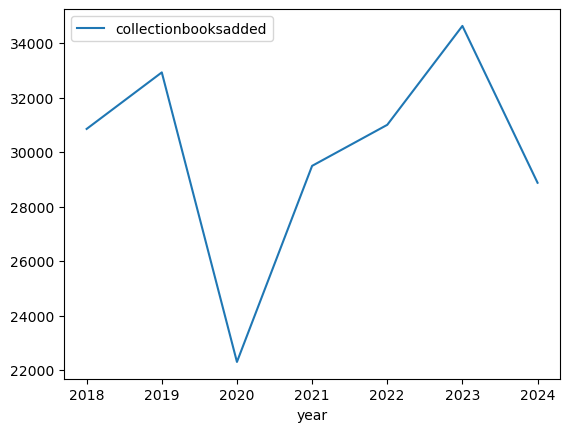

In [64]:
eugene_time.plot(kind="line", x="year", y="collectionbooksadded")

Let's see if this trend of spending collapse and recovery happened at other public libraries in Oregon by splitting the `all_years` frame by year into groups and getting the *median* number of books added.

In [65]:
all_years.groupby("year")["collectionbooksadded"].median()

year
2018   1793.000
2019   2068.000
2020   1525.500
2021   1517.000
2022   1838.000
2023   1753.500
2024   1629.500
Name: collectionbooksadded, dtype: float64

Now plot the grouped data.

<Axes: xlabel='year'>

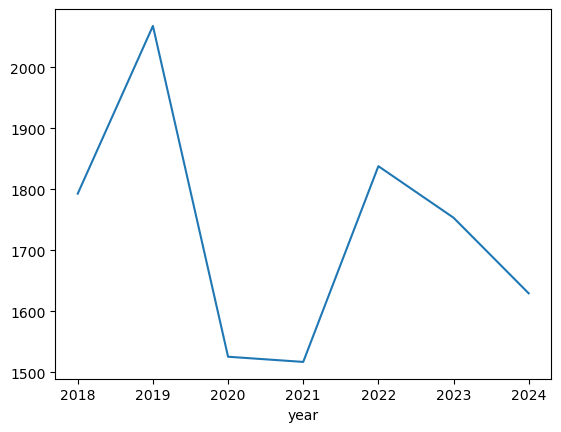

In [66]:
all_years.groupby("year")["collectionbooksadded"].median().plot(kind="line")

In comparison to Eugene, other public libraries in Oregon showed a pattern of book acquisition that never recovered after the COVID-19 pandemic.

When grouping our data by `year`, we easily plot mulitple lines by selecting
multiple columns in the frame. By default, each column gets its own line.

<Axes: xlabel='year'>

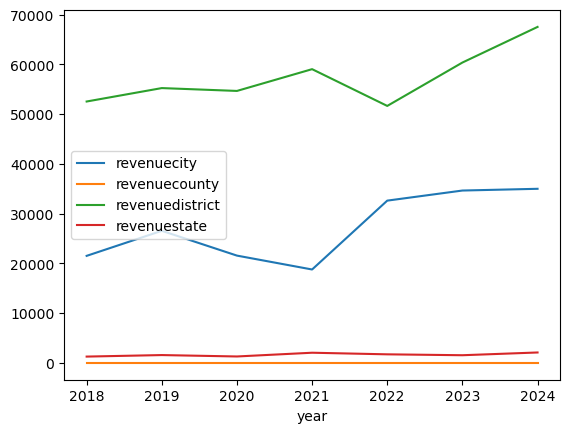

In [67]:
all_years.groupby("year")[[
    "revenuecity","revenuecounty","revenuedistrict", "revenuestate"]].median().plot()

### Multi-Hots

**Bonus**: Interested in statistics or machine learning? It's so common for raw data to represented in that awkward `;` or `,` separated format that Pandas has a built-in way to convert one **Series** with multiple categorical values into a **DataFrame** of binary variables. If there are *n* possible categorical features, this will create *n* binary variables. 

This [**Series.str.get_dummies()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html#pandas.Series.str.get_dummies) function for creating dummy variables is also called a multi-hot. It's essential when working with models that require numeric features, as it translates strings into 0s and 1s by splitting them by a delimiter character.



The `collectionotherlanguages` column of `libraries` includes valuable information about materials in non-english languages, but values like `Arabic; Chinese (including Mandarin & Cantonese); French; German; Hindi; Ilocano, Samoan or Hawaiian; Japanese; Korean; Russian; Somali; Swahili; Tagalog; Thai, Lao; Ukrainian; Vietnamese; other` are not computer-readable. At scale, this does not tell me how many libraries have say, Russian materials.

In [68]:
libraries["collectionotherlanguages"].value_counts().head(10)

collectionotherlanguages
Arabic; Chinese (including Mandarin & Cantonese); French; German; Hindi; Ilocano, Samoan or Hawaiian; Japanese; Korean; Russian; Somali; Swahili; Tagalog; Thai, Lao; Ukrainian; Vietnamese; other            6
Arabic; Chinese (including Mandarin & Cantonese); French; German; Hindi; Ilocano, Samoan or Hawaiian; Japanese; Korean; Russian; Swahili; Tagalog; Thai, Lao; Ukrainian; Vietnamese; other                    5
Arabic; Chinese (including Mandarin & Cantonese); French; German; Hindi; Japanese; Korean; Russian; Tagalog; Thai, Lao; Vietnamese; other                                                                     3
other                                                                                                                                                                                                         3
Arabic; Chinese (including Mandarin & Cantonese); French; German; Hindi; Ilocano, Samoan or Hawaiian; Japanese; Korean; Russian; Tagalog; Thai,

This column is semicolon-separated. Let's see how the `get_dummies` algorithm performs without further cleaning.

In [ ]:
libraries["collectionotherlanguages"].str.get_dummies(sep=";")

,Chinese (including Mandarin & Cantonese),French,German,Hindi,"Ilocano, Samoan or Hawaiian",Japanese,Korean,Mam,Marshallese,Quiche,Russian,Somali,Swahili,Tagalog,"Thai, Lao",Ukrainian,Vietnamese,other,Arabic,Chinese (including Mandarin & Cantonese),French,German,Hindi,Japanese,Russian,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Inspecting the results, we'll need to clean this column a little before we can use it. There are two `other` columns and two columns related to Chinese-language collections.

In [ ]:
libraries["collectionotherlanguages"].str.get_dummies(sep=";").columns

Index([' Chinese (including Mandarin & Cantonese)', ' French', ' German',
       ' Hindi', ' Ilocano, Samoan or Hawaiian', ' Japanese', ' Korean',
       ' Mam', ' Marshallese', ' Quiche', ' Russian', ' Somali', ' Swahili',
       ' Tagalog', ' Thai, Lao', ' Ukrainian', ' Vietnamese', ' other',
       'Arabic', 'Chinese (including Mandarin & Cantonese)', 'French',
       'German', 'Hindi', 'Japanese', 'Russian', 'other'],
      dtype='object')

Here's where the duplicates come from, additional white space. Strip all white space with `.str.replace()`.

In [69]:
libraries["collectionotherlanguages"] = libraries["collectionotherlanguages"].str.replace(" ", "")

In [70]:
libraries["collectionotherlanguages"].str.get_dummies(sep=";").columns

Index(['Arabic', 'Chinese(includingMandarin&Cantonese)', 'French', 'German',
       'Hindi', 'Ilocano,SamoanorHawaiian', 'Japanese', 'Korean', 'Mam',
       'Marshallese', 'Quiche', 'Russian', 'Somali', 'Swahili', 'Tagalog',
       'Thai,Lao', 'Ukrainian', 'Vietnamese', 'other'],
      dtype='object')

This looks better! We can rename some of these later.

In [71]:
libraries["collectionotherlanguages"].str.get_dummies(sep=";")

,Arabic,Chinese(includingMandarin&Cantonese),French,German,Hindi,"Ilocano,SamoanorHawaiian",Japanese,Korean,Mam,Marshallese,Quiche,Russian,Somali,Swahili,Tagalog,"Thai,Lao",Ukrainian,Vietnamese,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,1
132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
133,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Want to add this back into the `libraries` DataFrame as 18 new variables? We can use **pd.concat()** to combine the DataFrames along the **columns** axis.

In [72]:
lang_multi_hot = libraries["collectionotherlanguages"].str.get_dummies(sep=";")
pd.concat([libraries, lang_multi_hot], axis="columns") # We need to wrap our input DataFrames in a list

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate,has_fines,Arabic,Chinese(includingMandarin&Cantonese),French,German,Hindi,"Ilocano,SamoanorHawaiian",Japanese,Korean,Mam,Marshallese,Quiche,Russian,Somali,Swahili,Tagalog,"Thai,Lao",Ukrainian,Vietnamese,other
0,OR0040,2024,Adams Public Library,PO Box 20,Adams,97810,PO Box 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,237.000,21.000,0.000,0.620,0.000,0,0,False,False,0,0,1,1,0.000,0.000,49676.270,1000,7030,0.000,35036.000,0.000,0.000,0.000,0.000,31065.770,0.000,8672.860,0.000,0.000,11831.970,0.000,0.000,0.000,3155,330,85,38,714,97,23,7,62617,7261,511,119,40311,4260,388,1916,0,0,0,0,0,0,0,0,22,0,1,0,350.000,149.000,464.000,17

Once we're satisfied, write over the `libraries` DataFrame with the concatenated
copy.

In [73]:
libraries = pd.concat([libraries, lang_multi_hot], axis="columns") # We need to wrap our input DataFrames in a list

Let's use another convenient function to clean up our data: [**Series.str**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html#pandas.Series.str) methods  perform quick string-based operations like replacing patterns and adjusting casing. We can apply these functions to make casing consistent across features, as languages like `French` are capitalized.

First, let's make the Chinese column more concise using **.rename()** and the following mapping: `{"Chinese(includingMandarin&Cantonese)":"Chinese"}`.

In [74]:
libraries.rename(columns={"Chinese(includingMandarin&Cantonese)":"Chinese"})

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate,has_fines,Arabic,Chinese,French,German,Hindi,"Ilocano,SamoanorHawaiian",Japanese,Korean,Mam,Marshallese,Quiche,Russian,Somali,Swahili,Tagalog,"Thai,Lao",Ukrainian,Vietnamese,other
0,OR0040,2024,Adams Public Library,PO Box 20,Adams,97810,PO Box 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,237.000,21.000,0.000,0.620,0.000,0,0,False,False,0,0,1,1,0.000,0.000,49676.270,1000,7030,0.000,35036.000,0.000,0.000,0.000,0.000,31065.770,0.000,8672.860,0.000,0.000,11831.970,0.000,0.000,0.000,3155,330,85,38,714,97,23,7,62617,7261,511,119,40311,4260,388,1916,0,0,0,0,0,0,0,0,22,0,1,0,350.000,149.000,464.000,175.000,504.000,230.000,0.000,0

Once that looks good, let's apply that to the `libraries` DataFrame by assigning that copy back to `libraries`.

In [75]:
libraries = libraries.rename(columns={"Chinese(includingMandarin&Cantonese)":"Chinese"})

Once that looks good, let's apply that to the `libraries` DataFrame by assigning that copy back to `libraries`.

Let's test by summing our new, renamed column.

In [76]:
libraries["Chinese"].sum() # There are this many libraries in Oregon with Chinese-language collections

np.int64(58)

Let's say I want to find out **how many** libraries per county offer materials in each of the following languages: Japanese, Korean, Chinese, and Vietnamese. We can use **groupby** and **aggregation** to count the number of rows (libraries) that offer materials in each language per county.

In [77]:
libraries[["county", "Japanese", "Korean", "Chinese", "Vietnamese"]].groupby("county").sum()

,Japanese,Korean,Chinese,Vietnamese
county,,,,
Baker,1,1,1,1
Benton,1,1,1,0
Clackamas,12,12,12,12
Clatsop,0,0,0,0
Columbia,3,2,2,1
Coos,6,4,5,0
Crook,0,0,0,0
Curry,2,2,2,1
Deschutes,0,0,0,0


This is all well and good, but, for plotting purposes, I want to filter out counties that have no East Asian language materials whatsoever.
Let's create a boolean index that identifies rows that sum to **more than 0**. We will need to use an *axis* argument to sum up along the columns for this.

In [78]:
by_county = libraries[["county", "Japanese", "Korean", "Chinese", "Vietnamese"]].groupby("county").sum()
by_county.sum(axis="columns") > 0

county
Baker          True
Benton         True
Clackamas      True
Clatsop       False
Columbia       True
Coos           True
Crook         False
Curry          True
Deschutes     False
Douglas        True
Gilliam       False
Grant         False
Harney        False
Hood River    False
Jackson        True
Jefferson     False
Josephine      True
Klamath        True
Lake          False
Lane           True
Lincoln        True
Linn           True
Malheur        True
Marion         True
Morrow        False
Multnomah      True
Polk          False
Sherman       False
Tillamook      True
Umatilla       True
Union          True
Wallowa        True
Wasco         False
Washington     True
Wheeler       False
Yamhill        True
dtype: bool

Applying this index to `by_county` gives us a subset that only includes counties with at least one East Asian language.

In [79]:
by_county[by_county.sum(axis="columns") > 0]

,Japanese,Korean,Chinese,Vietnamese
county,,,,
Baker,1,1,1,1
Benton,1,1,1,0
Clackamas,12,12,12,12
Columbia,3,2,2,1
Coos,6,4,5,0
Curry,2,2,2,1
Douglas,4,2,6,3
Jackson,1,1,1,1
Josephine,1,1,1,0


Let's plot this information with a bar chart. Remember to label and title appropriately.

<Axes: title={'center': 'East Asian Language Collections in Oregon Public Libraries'}, xlabel='County', ylabel='Libraries'>

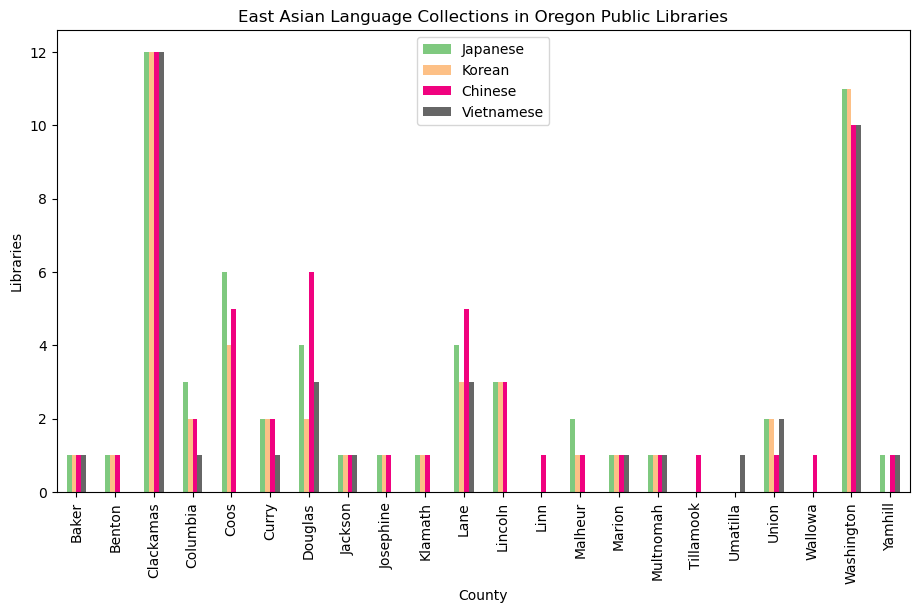

In [80]:
by_county[by_county.sum(axis="columns") > 0].plot(kind="bar", 
                                                  figsize=(11,6),
                                                  title="East Asian Language Collections in Oregon Public Libraries",
                                                  xlabel="County",
                                                  ylabel="Libraries",
                                                  colormap="Accent"
                                                 )

Finally, print your figure to an `svg` file.

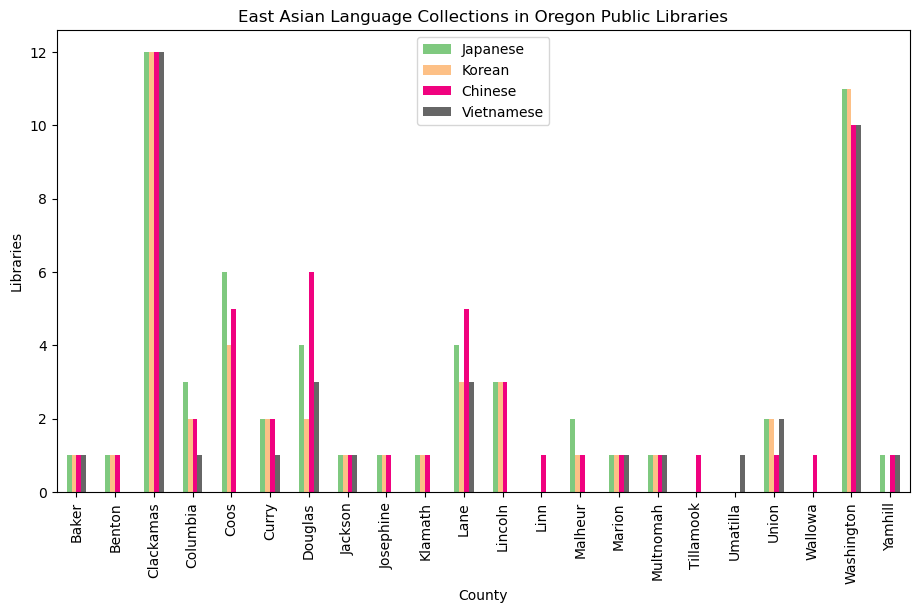

In [81]:
ax = by_county[by_county.sum(axis="columns") > 0].plot(kind="bar", 
                                                  figsize=(11,6),
                                                  title="East Asian Language Collections in Oregon Public Libraries",
                                                  xlabel="County",
                                                  ylabel="Libraries",
                                                  colormap="Accent"
                                                 )
fig = ax.get_figure()
fig.savefig("libraries_ea_collections.svg", format="svg", dpi=400, pad_inches=3)